In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import graphviz
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [2]:
dataset = pd.read_csv("C:/Users/Maira/Downloads/FASE4_ANALISIS/archive/Cleaned-Data.csv")
dataset.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [4]:
#VARIABLES PREDICTORIAS
X = dataset.iloc[:,1:27]

#VARIABLE A PREDECIR
Y = dataset.iloc[:,0]

#MOSTRAMOS LAS PRIMERAS 5 FILAS
X.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,0,1,1,1,1,0,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,0,1,1,1,1,0,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,0,0,0,1,0,China


In [5]:
from sklearn.model_selection import train_test_split

# X_train y Y_train para entrenamiento
# Y_test y Y_test para prueba
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, train_size = 0.2, random_state = 0)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63360 entries, 40596 to 305711
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tiredness                63360 non-null  int64 
 1   Dry-Cough                63360 non-null  int64 
 2   Difficulty-in-Breathing  63360 non-null  int64 
 3   Sore-Throat              63360 non-null  int64 
 4   None_Sympton             63360 non-null  int64 
 5   Pains                    63360 non-null  int64 
 6   Nasal-Congestion         63360 non-null  int64 
 7   Runny-Nose               63360 non-null  int64 
 8   Diarrhea                 63360 non-null  int64 
 9   None_Experiencing        63360 non-null  int64 
 10  Age_0-9                  63360 non-null  int64 
 11  Age_10-19                63360 non-null  int64 
 12  Age_20-24                63360 non-null  int64 
 13  Age_25-59                63360 non-null  int64 
 14  Age_60+                  63360 no

In [7]:
dataset = pd.get_dummies(dataset, columns = ["Country"], prefix ="Country", drop_first = True)

In [8]:
X = dataset.drop("Severity_Severe", axis = 1) # SE EXCLUYE LA COLUMNA "Severity_Severe" como etiqueta
Y = dataset["Severity_Severe"]
# SEPARAMOS LOS DATOS EN CARACTERISTICAS (X) Y ETIQUETAS (Y). 

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =42)

In [10]:
#CREAR MODELO DE ARBOL DE DECISION
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
tree_rules = tree.export_text(model, feature_names = list(X.columns))

In [12]:
# CREAMOS EL ARBOL DE DECISIONES DEL DATASET DEL TITANIC
from sklearn.tree import DecisionTreeClassifier

#Creamos instancia de DecisionTree
decisiontree = DecisionTreeClassifier()

In [13]:
from sklearn import tree
from graphviz import Source

# APLICAMOS LA FUNCION QUE RETORNA LA VISUALIZACION DEL ARBOL.

def plottree(decisiontree, features_names=None, class_names=None):
    """Returns a graphviz visualization of a scikit-learn decision tree
    
    Inputs
        - decisiontree: tree to visualize
        - feature_names: iterable with the names of the features present in the data.
        - class_names: iterable with the names of the classes present in the data, in increasing order.
        
    If the call to this function is the last line of a notebook cell, the tree is rendered automatically.
    """
    dot_data = tree.export_graphviz(
        decisiontree, 
        out_file=None, 
        filled=True, 
        rounded=True, 
        rotate=True,
        feature_names=features_names,
        class_names=class_names
    )
    return Source(dot_data)

In [14]:
# ENTRENAMOS EL MODELO DEL ARBOL
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [15]:
# BUSCAMOS PRECISAR LA INFORMACION SEGUN EL MODELO
from sklearn.metrics import accuracy_score

Y_pred = decisiontree.predict(X_test)
decision_tree_model_acc = accuracy_score(Y_pred, Y_test) * 100
print("Accuracy:", decision_tree_model_acc)

Accuracy: 100.0


In [26]:
dataset[['Contact_Yes','Gender_Female']].groupby('Contact_Yes').sum()#.values.tolist()

,Gender_Female
Contact_Yes,
0,70400
1,35200


In [30]:
dataset[['Gender_Male','Age_60+']].groupby('Gender_Male').sum()#.values.tolist()

,Age_60+
Gender_Male,
0,42240
1,21120


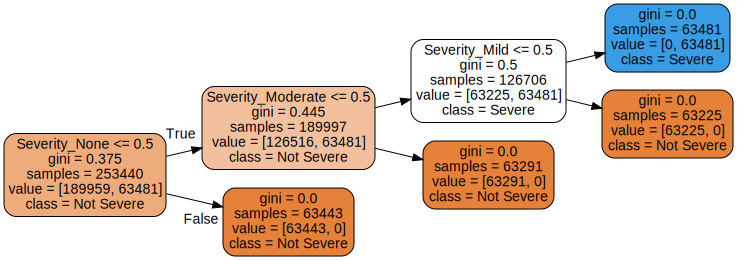

In [29]:
# AQUI SE GENERA EL ARBOL DE DECISION DEL DATASET DEL COVID19
#Show the generated tree
plottree(decisiontree, features_names=X_train.columns, class_names=["Not Severe", "Severe"])